# Least Action with least squares minimization 

http://web.mit.edu/jgross/Public/least_action/Principle%20of%20Least%20Action.pdf

### The equation of motion of an object tossed vertically
 
<img src="imgs/vtoss.jpg" width="400" />

$$x(t)=-\frac{{1}}{{2}}gt^2+v_0t$$


[0.   0.15 0.3  0.45 0.6  0.75 0.9  1.05 1.2  1.35 1.5  1.65 1.8  1.95
 2.1  2.25 2.4  2.55 2.7  2.85 3.  ]

[ 0.       2.13975  4.059    5.75775  7.236    8.49375  9.531   10.34775
 10.944   11.31975 11.475   11.40975 11.124   10.61775  9.891    8.94375
  7.776    6.38775  4.779    2.94975  0.9    ]


Text(0, 0.5, 'x [m]')

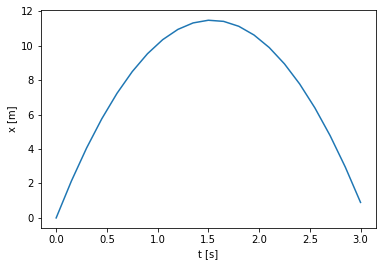

In [61]:
import numpy as np
import scipy.optimize
import pandas as pd
global g  
import matplotlib.pyplot as plt

g=9.8 #m/s^2
t=np.linspace(0,3,21,endpoint='True')
v0=15
xt=-0.5*g*t**2 + v0*t
xt[0]=0
#xt[-1]=0
print(t)
print()
print(xt)

fig,ax=plt.subplots(1,1)
ax.plot(t,xt)
ax.set_xlabel('t [s]')
ax.set_ylabel('x [m]')

### Let's imagine we dont know the equation of motion:

$$x(t)=-\frac{{1}}{{2}}gt^2+v_0t$$

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

<div style="float: right;" markdown="1">
    <img src="https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/leastaction1.svg?sanitize=true">
</div>

## Geometrical interpretation
Following the geometry theory developed [here](http://www.eftaylor.com/software/ActionApplets/LeastAction.html), we will try to define something called the _Action_ for one small segment of the free fall movement in one-dimension. 

For that we need the experimental data consisting on the height of an object of mass $m$ in free fall, and the height $x_i$, for each time $t_i$. This data would be fitted by a polynomial of degree two, as displayed in the figure for one of the fitted segments of the plot of $x$ as a function of $t$. We take the origin of the coordinates at ground level. For each segment we can calculate an average kinetic energy, $T$, and an averge potential energy, $V$, in the limit of $\Delta t=t_2-t_1$ small. From the figure

\begin{align}
T=\frac12 m v^2\approx &\frac12 m\left(\frac{x_2-x_1}{t_2-t_1}\right)^2\,,&
V=mgh\approx& m g \frac{x_2+x_1}{2}\,.
\end{align}

We can then reformulate the problem of the free fall in the following terms. From all the possible curves that can interpolate the points $(t_1,x_1)$ and $(t_2,x_2)$, which is the correct one?. 

The answer obtained by Leonhard Euler [1] can be obtained from the definition of the function "Lagrangian"
$$L(t)=T(t)-V(t)\,.$$

### Least Action:

With this, we can build the "Action", by integrating the Lagrangian function between the points $(t_1,x_1)$ and $(t_2,x_2)$ as
$$S=\int_{t_1}^{t_2} L\, \operatorname{d}t\,. $$

which give us a numerical result with units of energy multiplied by time (J$\cdot$s). What is worth noticing is that if we relax the definition of $V$ and allows for any $h$, but keeping the initial and final points fixed, we can calculate many Action values. This is illustrated in the figure for blue dotted ($S_1$), solid ($S_{\text{min}}$) and dashed ($S_2$)lines. But only the height, $(x_1+x_2)/2$ , associated with the real physical path, has a minimum value for the Action, $S_{\text{min}}$!

In fact, for one segment of the action between $(t_1,x_1)$, and $(t_2,x_2)$, with $\Delta t$ sufficiently small such that $L$ can be considered constant, we have
\begin{eqnarray}
S_{\text{min}}&=&\int_{t_1}^{t_2} L dt \\
&\approx& \left[\frac12 m v^2-m g h \right]\Delta t\\
&\approx& \left[\frac12 m\left(\frac{x_2-x_1}{t_2-t_1}\right)^2-m g \frac{x_2+x_1}{2} \right](t_2-t_1)
\end{eqnarray}
that corresponds to Eq. (11) of Am. J. Phys, Vol. 72(2004)478: http://www.eftaylor.com/pub/Symmetries&ConsLaws.pdf

<div style="float: right;" markdown="1">
    <img src="https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/leastaction3.svg?sanitize=true">
</div>

__Least Action method__: The least action method consist in the following steps illustrated in the figure
1. Fix the initial and final point of the movement. Example the initial time and the height from which a body is launched upwards, $(t_{\text{ini}},x_{\text{ini}})$, and the final time and height $(t_{\text{end}},x_{\text{end}})$.
1. Divide the problem in small segments of $\Delta t=t_{i+1}-t_i$.
1. Build many paths with the initial and final point fixed and calculates the Action in each segment, $S_i$, for all the paths
1. Choose the minimal Action for each segment, $S_{\text{min}}^i$, and rebuild the full path which minimizes the Action in each segment. This is the physical trajectory!

## Code implementation

### The Action
We define the Action $S$ such of an object of mass $m$ throw vertically upwards from $x_{\hbox{ini}}$, such that $t_{\hbox{end}}$ seconds later the object return to a height $x_{\hbox{end}}$, as
\begin{align}
S=&\int_{t_{\hbox{ini}}}^{t_{\hbox{end}}} L\, {\rm d}t \\
=& \sum_i S_i\\
=&\sum_i L_i \Delta t\,.
\end{align}

## Testing the Least Action components (object thrown vertically)

In [26]:
%pylab inline
import numpy as np
import scipy.optimize
import pandas as pd
global g  
g=9.8 #m/s^2

Populating the interactive namespace from numpy and matplotlib


In [27]:
tini=0 #[s]
tend=3 #[s]
xini=0 #[m]
xend=0 #[m]

In [28]:
x=np.array([xini,10,15.,22.,18.,5.,xend])#.size

In [29]:
#Initial points: x_i
x[:-1]

array([ 0., 10., 15., 22., 18.,  5.])

In [30]:
#final points: x_{i+1}
x[1:]

array([10., 15., 22., 18.,  5.,  0.])

In [31]:
Dx=x[1:]-x[:-1]
print(Dx)
Dt=tend/x[:-1].size
print(Dt)

[ 10.   5.   7.  -4. -13.  -5.]
0.5


### Numerical implementation of Least Action

In [32]:
def S(x,tend=3.,m=0.2,xini=0.,xend=0.):
    """
    Calculate the Action of an object of of mass 'm' throw vertically upward from 
       'xini', such that 'tend' seconds later the object return to a height 'xend'.
       Delta t must be constant.
       
    The defaults units for S are J.s   
    """
    x=np.asarray(x)
    Dt=tend/x[:-1].size
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ( (0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]) )*Dt).sum()

\begin{eqnarray}
S_i&\approx& \left[\frac12 m\left(\frac{x_2-x_1}{t_2-t_1}\right)^2-m g \frac{x_2+x_1}{2} \right](t_2-t_1)
\end{eqnarray}

\begin{eqnarray}
S_i&\approx& \left[0.5 m\left(\frac{\Delta x}{\Delta t}\right)^2-m g \frac{x_2+x_1}{2} \right]\Delta t
\end{eqnarray}

In [33]:
x=np.zeros(21)
S(x)

0.0

#### Example
_Problem_: Let an object of mass $m=0.2$ Kg throw vertically updward and returning back to the same hand after 3 s. Find the function of distance versus time of least Action. 

If we denote the height at time $t_i$ as $x_i=x(t_i)$, we can calculate the action for any set of $x_i$ points with the inititial and final points fixed at $0\ $m.

__Example__: By using the previous definition, calculates the Action for 21 steps in time from $0$ at $3\ $s for an object that does not move at all

__Solution__:

__Activity__:  _Brute force approach_

Open the Activity notebook in [CoCalc!](https://cocalc.com/projects/a8330cfb-9dfb-442e-9b2b-ba664e31a685/files/Activity_Least_Action.ipynb?session=default)

1) calculates the Action for 21 steps in time from $0$ at $3\ $s, for an object that at a random position in each time between zero and $15\ $m, but with the initial and final positions set to zero. Make the plot for the random curve. 


Let us divide the intervals in 21 parts:

In [40]:
#Initialize with the maximum possible value
Smin=np.inf
for i in range(1000000):
    #21 one random number between 0 and 15
    x=np.random.uniform(0,15,21)
    # Force the boundary conditions
    x[0]=0
    x[-1]=0
    Sx=S(x)
    if Sx<Smin:
        #Get new minimum
        Smin=Sx
        xmin=x
        print(Smin)

452.7987305965698
231.51923704222997
220.6995734974813
217.44881828002696
202.62447601808663
183.97370340190517
130.4862642755595
109.6539352170166
95.23201235961945
69.9152173915528
56.93635537550686
30.619860165139585


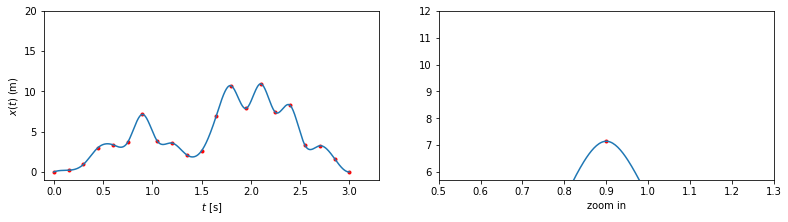

In [35]:
from scipy import interpolate
tx=np.linspace(0,3,len(xmin))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
p=[]
pi=0
pe=21
x1d=interpolate.interp1d(tx[pi:pe],xmin[pi:pe],kind=3)
txx=np.linspace(tx[pi],tx[pe-1],1000)
ax1.plot(tx,xmin,'r.')
ax1.plot(txx,x1d(txx))
ax1.set(xlim=(-0.1,3.3),ylim=(-1,20),
        xlabel='$t$ [s]',ylabel='$x(t)$ (m)')

ax2.plot(tx,xmin,'r.')
ax2.plot(txx,x1d(txx))
ax2.set(xlim=(0.5,1.3),ylim=(5.7,12),
        xlabel='zoom in')

fig.tight_layout(pad=4.0)

In [36]:
import scipy.optimize as optimize
def xfit(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):
    '''Find the array of n (odd) components that minimizes the action S(x)
    :Parameters:
    n: odd integer 
        dimension of the ndarray x that minimizes the action  S(x,t,m)
    t,m: numbers
       optional parameters for the action
    ftol: number
        acceptable relative error in S(x) for convergence.
    :Returns: (x,xmax,Smin)    
    x: ndarray
        minimizer of the action S(x)        
    xini:    
    xend:
    xmax: number
        Maximum height for the object
    Smin: number
        value of function at minimum: Smin = S(x)
    '''
    
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
  
    x0=np.zeros(n)
    a=optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt

In [41]:
t=3.
m=0.2
y=xfit(21,t,m)
x=y[0]
xmax=y[1]
Smin=y[2]
Dt=y[3]
tx=np.arange(0,t+Dt,Dt)

Optimization terminated successfully.
         Current function value: -21.554977
         Iterations: 28
         Function evaluations: 5837
(array([ 0.        ,  2.09485981,  3.96927762,  5.62312695,  7.05635241,
        8.26906363,  9.26154883, 10.03312026, 10.58423427, 10.91506033,
       11.02529045, 10.91501183, 10.58427987, 10.03303519,  9.26102159,
        8.26869546,  7.05596305,  5.62273064,  3.9689361 ,  2.09464162,
        0.        ]), 11.025290448185725, -21.55497732876534, 0.15)


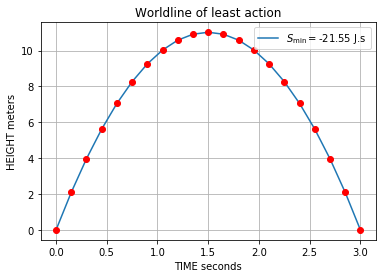

In [38]:
plt.plot(tx,x,label='$S_{\mathrm{min}}=$%.2f J.s' %Smin)
plt.plot(tx,x,'ro')
plt.ylabel('HEIGHT meters')
plt.xlabel('TIME seconds')
plt.title('Worldline of least action')
plt.legend(loc='best')
plt.grid()

Check the equation of motion: 
$$x(t)=-\frac{{1}}{{2}}gt^2+v_0t$$

In [39]:
P=poly1d (np.polyfit(tx,x,2),variable='t' )
print(P)

      2
-4.9 t + 14.7 t + 0.0001604
